A notebook used to run experiments

In [ ]:
from scripts.nca import VoxelUtil as util
from scripts.vox.Vox import Vox

size = 8
dist = 2

# seed_1 = util.custom_seed(_size=size, _dist=dist, _plus_x='red', _plus_y='green', _plus_z='blue')
# Vox().load_from_tensor(seed_1).render(_show_grid=True)

# seed_2 = util.custom_seed(_size=size, _dist=dist, _minus_x='green', _plus_y='red', _plus_z='blue')
# Vox().load_from_tensor(seed_2).render(_show_grid=True)

# seed_3 = util.custom_seed(_size=size, _dist=dist, _minus_x='red', _minus_y='green', _plus_z='blue')
# Vox().load_from_tensor(seed_3).render(_show_grid=True)

# seed_4 = util.custom_seed(_size=size, _dist=dist, _plus_x='green', _minus_y='red', _plus_z='blue')
# Vox().load_from_tensor(seed_4).render(_show_grid=True)

seed_5 = util.custom_seed(_size=size, _dist=dist, _plus_y='red',_minus_y='cyan')
Vox().load_from_tensor(seed_5).render(_show_grid=True)

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print (x[:-3])
print (x[-1])
print (x[-2])
print (x[-3])
print (x[-1:])
print (x[-2:])
print (x[-3:])
print (x[-1:])
print (x[-2:-1])
print (x[-3:-2])

In [ ]:
import torch
import math
import numpy as np
from scripts.nca import VoxelUtil as util
from scipy.spatial.transform import Rotation

test_cases = [
# Basic Cases
([0, 0, 0], [1, 0, 0, 0]),

# Rotation around Each Axis
([45, 0, 0], [0.92388, 0.38268, 0, 0]),
([0, 30, 0], [0.96593, 0, 0.25882, 0]),
([0, 0, 60], [0.86603, 0, 0, 0.5]),

# Combined Rotations
([45, 30, 60], [0.85355, 0.35355, 0.14644, 0.35355]),

# Negative Angles
([-45, -30, -60], [0.85355, -0.35355, -0.14644, -0.35355]),

# Edge Cases
([90, 0, 0], [0, 1, 0, 0]),
([0, 90, 0], [0.70711, 0.70711, 0, 0]),
([0, 0, 90], [0.70711, 0, 0, 0.70711]),

# Random Angles
([23.5, 56.8, -12.3], [0.91018, 0.36363, 0.17845, -0.09006]),

# Normalization
([180, 0, 0], [-1, 0, 0, 0]),

# Singularities
([90, 90, 0], [0.5, 0.5, 0.5, -0.5]),
([90, -90, 0], [0.5, -0.5, 0.5, 0.5]),
]
    
    
for i in range(len(test_cases)):
    tc = test_cases[i]
    _ax = tc[0][0]
    _ay = tc[0][1]
    _az = tc[0][2]
    x = torch.tensor([math.radians(_ax)]).unsqueeze(0)
    y = torch.tensor([math.radians(_ay)]).unsqueeze(0)
    z = torch.tensor([math.radians(_az)]).unsqueeze(0)
    q = util.euler_to_quaternion(x, y, z)
    
    r = Rotation.from_euler('xyz', [_ax, _ay, _az], degrees=True)
    sci_q = r.as_quat()
    sci_q2 = [sci_q[3], sci_q[0], sci_q[1], sci_q[2]]
    
    
    print (f'test case: {i}:\n\t angle: {tc[0]},\n\t quat: {tc[1]},\n\t util res: {np.array(q)},\n\t scipy res: {sci_q2},\n\t pass: {q == sci_q2}')

In [ ]:
from scipy.spatial.transform import Rotation

p = [[0.43, 0.79, 0.11], [0.21, 0.11, 12.33]]
r = [[45, 30, 60], [-45, -30, -60]]

rot = Rotation.from_euler('xyz', r, degrees=True)
res = rot.apply(p)

print (f'p: {p}, res: {res}')

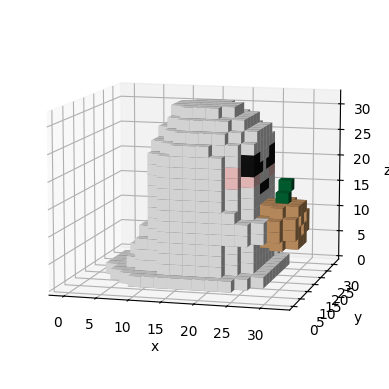

angle = 0
px:


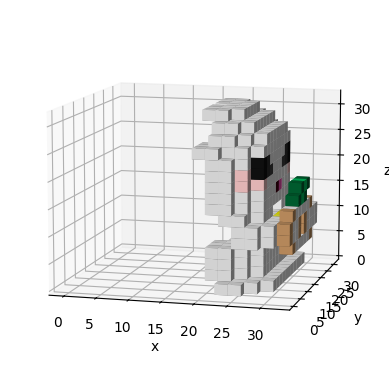

py:


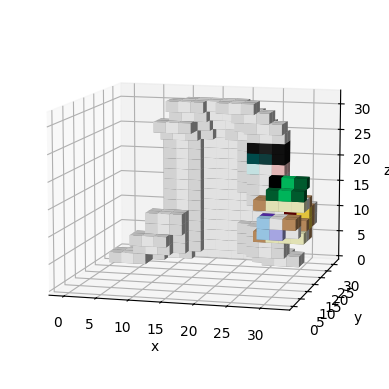

angle = pi/4
px:


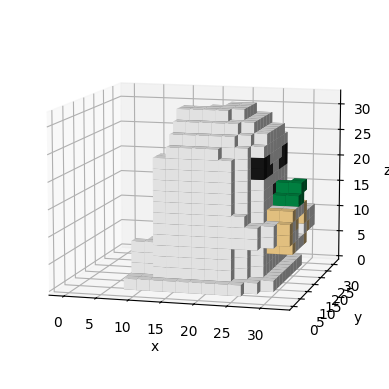

py:


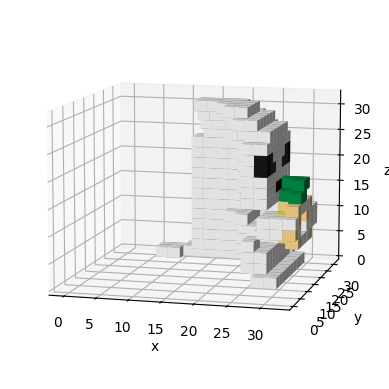

angle = pi/2
px:


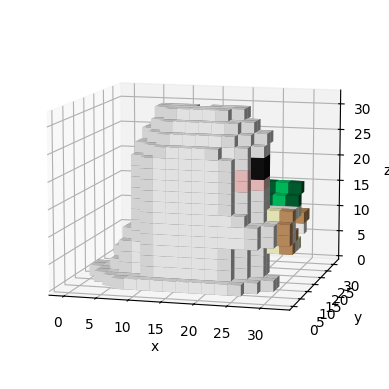

py:


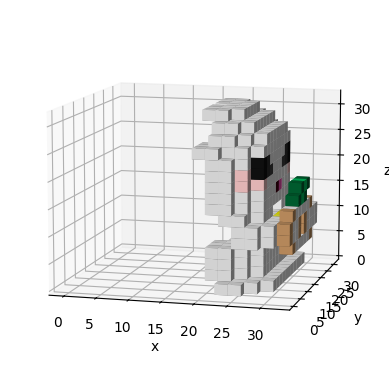

comp: True
angle = 3pi/4
px:


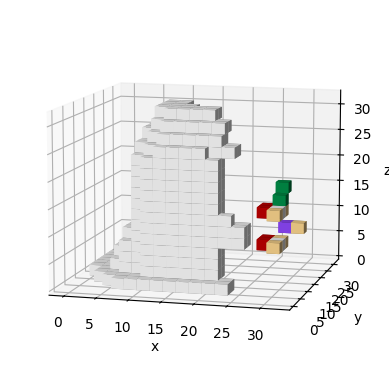

py:


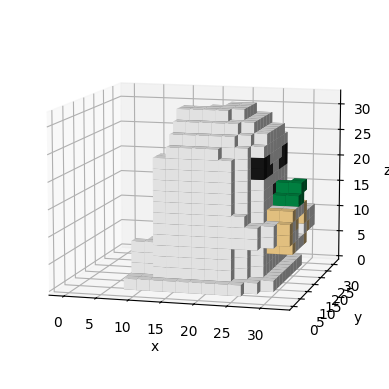

angle = pi
px:


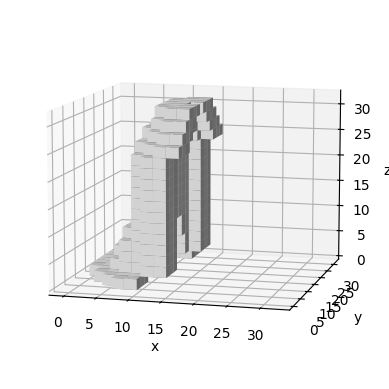

py:


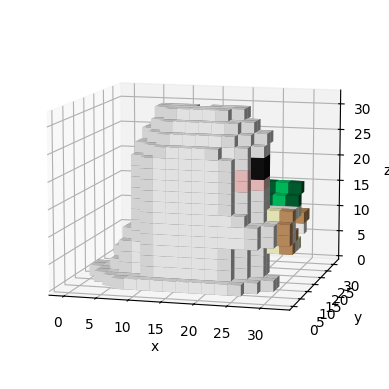

angle = rand
px:


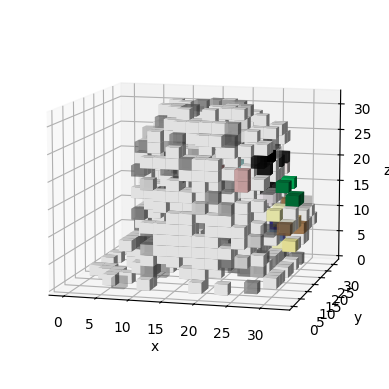

py:


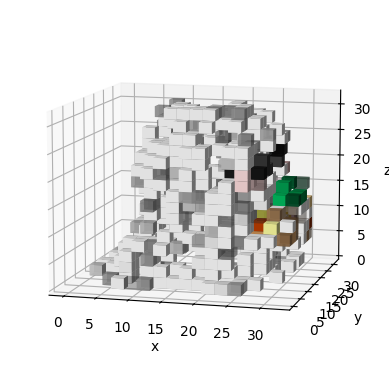

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
import torch

from scripts.vox.Vox import Vox
from scripts.nca.VoxelPerception import VoxelPerception as vp
from scripts.nca.VoxelPerception import X_SOBEL_KERN, Y_SOBEL_KERN, Z_SOBEL_KERN, X_SOBEL_2D_KERN, Y_SOBEL_2D_KERN, Z_SOBEL_2D_KERN, Y_SOBEL_2D_KERN_v2, X_SOBEL_2D_KERN_v2

cowboy = Vox().load_from_file('../vox/ghosty.vox')
size = 16

# * make sure Vox.tensor() works as expeccted
cowboy_ten = cowboy.tensor().to('cuda')
Vox().load_from_tensor(cowboy_ten).render(_show_grid=True)

percep = vp()
gx = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_KERN[None, :])
gy = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_KERN[None, :])
gz = percep.per_channel_conv3d(cowboy_ten, Z_SOBEL_KERN[None, :])
gx2d = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_2D_KERN[None, :])
gy2d = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_2D_KERN[None, :])
gz2d = percep.per_channel_conv3d(cowboy_ten, Z_SOBEL_2D_KERN[None, :])
gy2dv2 = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_2D_KERN_v2[None, :])
gx2dv2 = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_2D_KERN_v2[None, :])

# print ('sobel x:')
# Vox().load_from_tensor(gx).render(_show_grid=True)

# print ('sobel 2d x:')
# Vox().load_from_tensor(gx2d).render(_show_grid=True)

# print ('sobel 2d x v2:')
# Vox().load_from_tensor(gx2dv2).render(_show_grid=True)

# print ('sobel y:')
# Vox().load_from_tensor(gy).render(_show_grid=True)

# print ('sobel 2d y:')
# Vox().load_from_tensor(gy2d).render(_show_grid=True)

# print ('sobel 2d y v2:')
# Vox().load_from_tensor(gy2dv2).render(_show_grid=True)

# print ('sobel 2d z:')
# Vox().load_from_tensor(gz2d).render(_show_grid=True)

angle = torch.zeros([size, size, size]).to('cuda') 
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

c0 = px

print ('angle = 0')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)

angle += (torch.pi/4)
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

print ('angle = pi/4')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)

angle += (torch.pi/4)
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

print ('angle = pi/2')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)

c1 = py
dif = torch.abs(c0 - c1)
res = torch.all(dif < 0.0001)
print (f'comp: {res}')

angle += (torch.pi/4)
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

print ('angle = 3pi/4')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)

angle += (torch.pi/4)
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

print ('angle = pi')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)

angle = torch.rand([size, size, size]).to('cuda') * torch.pi * 2
_cos, _sin = angle.cos(), angle.sin()
px = (gx2dv2*_cos)-(gy2dv2*_sin)
py = (gx2dv2*_sin)+(gy2dv2*_cos)

print ('angle = rand')
print ('px:')
Vox().load_from_tensor(px).render(_show_grid=True)
print ('py:')
Vox().load_from_tensor(py).render(_show_grid=True)